In [1]:
#Librería de graficación
import matplotlib.pyplot as plt
import matplotlib as mp
import cartopy.crs as ccrs
import cartopy
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import metpy.calc as mpcalc
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.gridspec as gsa
import matplotlib.ticker as mticker
from mpl_toolkits.basemap import Basemap
from matplotlib import pyplot, transforms
import matplotlib.colors as colors
from shapely.geometry.polygon import LinearRing

#Librerías para red neuronal


#Librerías de procesamiento matemático y lectura de archivos
import numpy as np
import netCDF4 as nc
import pandas as pd
import glob
import os
from scipy import signal

#Librería de estadística
import scipy as sp
from scipy.stats import pearsonr,spearmanr

#librería para manejo de fechas
from datetime import datetime,timedelta

plt.style.use("seaborn")
mp.rcParams['xtick.labelsize']=15
mp.rcParams['ytick.labelsize']=15

mp.rcParams['axes.labelsize']=17

In [2]:
def reading_netcdf(ruta):
    data=nc.Dataset(ruta)
    for i in data.variables:
        try:
            print (i,data.variables[i].shape,data.variables[i].units) 
        except:
            print (i,data.variables[i].shape) 
    print("\n")
    data_variables=[np.array(data[i][:]) for i in list(data.variables.keys())]
    return data_variables

In [3]:
rutas = np.array(np.sort(glob.glob("/home/franklin/Documentos/GitHub/TDG/Dataset/Glorys_CMEMS_Monthly/*.nc")),dtype="str")

#Al estar por años se debe concatenar
for i in range(0,len(rutas)):
    if i==0:
        [d,lat,v,temp,u,time,lon,ssh]=reading_netcdf(rutas[i])
    else:
        [d2,lat2,v2,temp2,u2,time2,lon2,ssh2]=reading_netcdf(rutas[i])
        ssh=np.concatenate((ssh,ssh2))
#         temp=np.concatenate((temp,temp2))
        time=np.concatenate((time,time2))
#         v=np.concatenate((v,v2))
#         u=np.concatenate((u,u2))

depth (1,) m
latitude (241,) degrees_north
vo (12, 1, 241, 1873) m s-1
thetao (12, 1, 241, 1873) degrees_C
uo (12, 1, 241, 1873) m s-1
time (12,) hours since 1950-01-01
longitude (1873,) degrees_east
zos (12, 241, 1873) m


depth (1,) m
latitude (241,) degrees_north
vo (12, 1, 241, 1873) m s-1
thetao (12, 1, 241, 1873) degrees_C
uo (12, 1, 241, 1873) m s-1
time (12,) hours since 1950-01-01
longitude (1873,) degrees_east
zos (12, 241, 1873) m


depth (1,) m
latitude (241,) degrees_north
vo (12, 1, 241, 1873) m s-1
thetao (12, 1, 241, 1873) degrees_C
uo (12, 1, 241, 1873) m s-1
time (12,) hours since 1950-01-01
longitude (1873,) degrees_east
zos (12, 241, 1873) m


depth (1,) m
latitude (241,) degrees_north
vo (12, 1, 241, 1873) m s-1
thetao (12, 1, 241, 1873) degrees_C
uo (12, 1, 241, 1873) m s-1
time (12,) hours since 1950-01-01
longitude (1873,) degrees_east
zos (12, 241, 1873) m


depth (1,) m
latitude (241,) degrees_north
vo (12, 1, 241, 1873) m s-1
thetao (12, 1, 241, 1873) degrees

In [8]:
ssh[ssh<=-1000]=np.nan

In [9]:
da=[datetime(1950,1,1,0,0,0)+timedelta(hours=int(time[w])) for w in range (0,len(time))]
date=pd.DatetimeIndex(da)

In [10]:
new_array = np.array(date.to_pydatetime(), dtype=object)

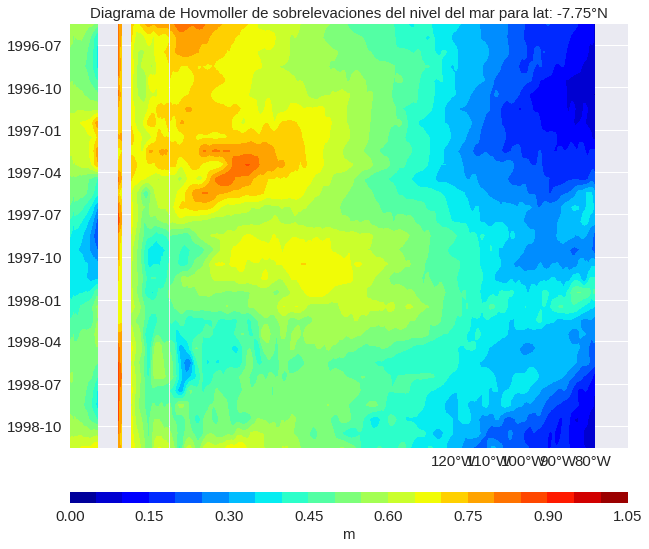

In [24]:
fig=plt.figure(figsize=(10,13))

gs = gsa.GridSpec(nrows=2, ncols=1,height_ratios=[1,6],hspace=0.2)

x_tick_labels = [u'120\N{DEGREE SIGN}W', u'110\N{DEGREE SIGN}W',
                 u'100\N{DEGREE SIGN}W', u'90\N{DEGREE SIGN}W',
                 u'80\N{DEGREE SIGN}W']

y_tick_labels = [u'-2\N{DEGREE SIGN}N', u'0\N{DEGREE SIGN}N',
                 u'2\N{DEGREE SIGN}N', u'4\N{DEGREE SIGN}N',
                 u'6\N{DEGREE SIGN}N',u'8\N{DEGREE SIGN}N']

xlocs=np.arange(-120, -60, 10)
ylocs=np.arange(-3,10,2)

# Acerca del primer subplot
# ax1 = fig.add_subplot(gs[0, 0], projection=ccrs.PlateCarree())
# ax1.set_extent([lon[0], lon[-1], lat[0],lat[-1]], ccrs.PlateCarree())
# ax1.coastlines('50m')
# ax1.add_feature(cartopy.feature.LAND, zorder=0,facecolor='#B1B2B4')
# ax1.plot([lon[0],lon[-1]],[lat[27],lat[27]],color='red',transform=ccrs.PlateCarree())

gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.2, linestyle='--',
                   xlocs=xlocs,ylocs=ylocs)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 13, 'color': 'black'}
gl.ylabel_style = {'size': 13, 'color': 'black'}

# plt.title('CMEMS Reanalysis',y=1.3, loc='right',fontsize=18)

# Acerca del segundo subplot
ax2 = fig.add_subplot(gs[1, 0])
ax2.invert_yaxis()  # Reverse the time order to do oldest first
ax2.set_title('Diagrama de Hovmoller de sobrelevaciones del nivel del mar para lat: '+str(lat[27])+"°N",fontsize=15)

x,y=np.meshgrid(lon,new_array)
cf=ax2.contourf(x,y,ssh[:,27,:],20,cmap="jet")
# cr=ax2.contour(x,y,ssh[:,:],20,colors="k",linewidths=0.3)
cbar = plt.colorbar(cf, orientation='horizontal', pad=0.08, aspect=50)
cbar.set_label('m',fontsize=15)
cbar.ax.tick_params(labelsize=15) 

ax2.set_xticks(np.array(xlocs)+360)
ax2.set_xticklabels(x_tick_labels)
ax2.set_ylim((new_array[70],new_array[40]))

ax2.tick_params(labelsize=15)
# plt.savefig('./Plots/1.hovmoller_lon_mod.png',dpi=600,bbox_inches="tight")